<h1>Analysis of Tweets Using the CometLanding Hashtag</h1>

In [1]:
%matplotlib inline

<h2>Preprocessing input CSV data</h2>

In [2]:
from parsing import *
cr = CensusReader("data/CometLanding.csv")

File contains 51 invalid rows!
Refining the data given and storing it a new file...
Refined data can be found in 'data/CometLanding_refined.csv'.


<h3>CensusReader class __init__() method</h3>
<p>The __init__() method in the CensusReader class calls read_csv() from pandas on the file CometLanding.csv.<br/>
    This creates a DataFrame which is then parsed with validateFile(); invalid tweets are removed in this process.</p>

In [3]:
def __init__(self, fileName):
    self.fileName = fileName
    self.data = pd.read_csv(fileName)
    
    self.data["valid"] = True
    self.validateFile()

<h3>validateFile() method</h3>
<p>The validateFile() method finds all duplicte entries in the DataFrame (by their string tweet ID).<br/>
    It then removes all the duplicate entries from the DataFrame, before printing the number of duplicate tweets (invalid rows) there were.<br/>
    Finally, it outputs the remaining (valid, non-duplicate) entries/tweets in the DataFrame to a new CSV file.<br/>
    It outputs it to the filename the data was read in from, with _refined added before the .csv extension; the data is converted from a DataFrame into CSV format using the to_csv() method.</p>

In [4]:
def validateFile(self):
        #check duplication
        self.data["valid"] = self.data["valid"] & ~(self.data.duplicated("id_str"))

        invalidData = self.data.query("valid == False")
        self.data = self.data.query("valid == True")

        # Drops the 'valid' column since it is no longer needed.
        self.data.drop('valid', axis=1, inplace=True)

        invalidRows = len(invalidData)

        if (invalidRows > 0):
            if invalidRows == 1:
                print("File contains 1 invalid row!")
            else:
                print("File contains "+str(invalidRows)+ " invalid rows!")

            #make a new file
            if self.fileName[-4:] == ".csv":
                print("Refining the data given and storing it a new file...")
                newFileName = self.fileName[:-4] + "_refined.csv"
                self.data.to_csv(newFileName)
                print("Refined data can be found in \'" + newFileName + "\'.")

<h2>Counting the numbers of tweets, replies, retweets, and users, and calculating average user activity.</h3>

In [5]:
from parsing import *

cr = CensusReader("data/CometLanding_refined.csv")
retweets = cr.retweetCount()
replies = cr.replyCount()
tweets = cr.tweetCount()
users = cr.userCount()

print("\nThere were " + str(tweets) + " tweets in total.")
print("There were " + str(replies) + " replies in total.")
print("There were " + str(retweets) + " retweets in total.\n")

print("There were " + str(users) + " users tweeting in the dataset.\n")

print("The average number of tweets by a user in the dataset was " + str(tweets / users) + ".")
print("The average number of replies by a user in the dataset was " + str(replies / users) + ".")
print("The average number of retweets by a user in the dataset was " + str(retweets / users) + ".")


There were 15547 tweets in total.
There were 1723 replies in total.
There were 59998 retweets in total.

There were 50192 users tweeting in the dataset.

The average number of tweets by a user in the dataset was 0.309750557858.
The average number of replies by a user in the dataset was 0.0343281797896.
The average number of retweets by a user in the dataset was 1.1953697800446286.


<h3>retweetCount() method</h3>
<p>The retweetCount() method first finds if the tweet text for each item in the DataFrame from the CSV data starts with "RT", indicating it is a retweet.<br/>
    Each result is added to a new list of Boolean values; the sum() method is then used to count the number of True values in the list (i.e. retweets).<br/>
    The value of the sum function is then returned.</p>

In [6]:
def retweetCount(self):
    return (self.data['text'].str.startswith("RT")).sum()

<h3>replyCount() method</h3>
<p>The replyCount() method first finds if the 'in_reply_to_screen_name' field for each item in the DataFrame from the CSV isn't empty, indicating it is a reply.<br/>
    Each result is added to a new list of Boolean values; the sum() method is then used to count the number of True values in the list (i.e. replies).<br/>
    The value of the sum function is then returned.</p>

In [7]:
def replyCount(self):
    return (self.data['in_reply_to_screen_name'].notnull()).sum()

<h3>tweetCount() method</h3>
<p>The tweetCount() method first finds the number of unique tweets. It does this by taking all parsable entries in the DataFrame (from which duplicates have already been dropped).<br/>
It then finds the length of the resulting DataFrame (of all unique tweets), representing the total number of tweets of any kind.<br/>
To then find the number of tweets that are not replies or retweets, we then subtract the result of the replyCount() and retweetCount() methods from the number of unique tweets found.</p>

In [8]:
def tweetCount(self):
    return len(self.data['entities_str'].notnull()) - self.replyCount() - self.retweetCount()

<h3>userCount() method</h3>
<p>The userCount() method first finds entries in the DataFrane who have unique posting users (i.e. removing all but one tweet posted by each user with one or more tweet in the dataset)<br/>
    It does this with the pandas drop_duplicates() method.<br/>
The length of the resulting DataFrame is then returned, representing the number of unique uesers who posted tweets in the dataset.</p>

In [9]:
def userCount(self):
    return len(self.data.drop_duplicates(subset=['from_user_id_str']))

<h2>Pie chart showing composition of activity by type</h2>

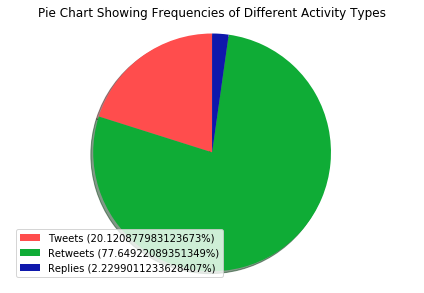

In [10]:
from parsing import *
from plotter import *

cr = CensusReader("data/CometLanding_refined.csv")

retweets = cr.retweetCount()
replies = cr.replyCount()
tweets = cr.tweetCount()

plotter = Plotter()
plotter.pieChart(tweets, retweets, replies)

<h3>pieChart() method</h3>
<p>The pieChart() method begins by adding the numbers of tweets, retweets, and replies in the DataFrame.<br/>
    It then finds the percentage proportion of all activity for each activity type (tweets, retweets, and replies).<br/>It then creates lists of labels for the legend, the "slice" sizes, and colours of the pie chart.<br/>
    These and other arguments are then passed to plt.pie() and other plt() methods to generate and then display the pie chart (plt represents matplotlib.pyplot).</p>

In [11]:
def pieChart(self, tweets, retweets, replies):
    total = tweets + retweets + replies
    # The slices will be ordered and plotted counter-clockwise.
    percents = [(float(tweets)/float(total)*100.0), (float(retweets)/float(total)*100.0),(float(replies)/float(total)*100.0)]

    labels = 'Tweets (' + str(percents[0]) + '%)', 'Retweets (' + str(percents[1]) + '%)', 'Replies (' + str(percents[2]) + '%)'
    fracs = [tweets, retweets, replies]
    colors = ['#ff4d4d', '#0FAC36', '#0F18AC'] # red, green, blue

    patches, texts = plt.pie(fracs, colors=colors, shadow=True, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')

    plt.tight_layout()
    plt.title('Pie Chart Showing Frequencies of Different Activity Types')
    plt.show()

<h2>Bar chart showing composition of activity by type</h2>

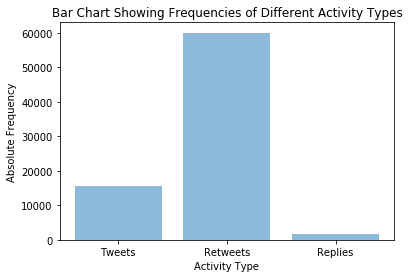

In [12]:
from parsing import *
from plotter import *

cr = CensusReader("data/CometLanding_refined.csv")

retweets = cr.retweetCount()
replies = cr.replyCount()
tweets = cr.tweetCount()


plotter = Plotter()
plotter.barChart(tweets, retweets, replies)

<h3>The barChart() method</h3>
<p>The barChart() method is very similar to the pieChart() method, using the numbers of tweets, retweets, and replies in the DataFrame.<br/>
    Again, values to be used as parameters for the bar chart are generated from the fequency of each activity type; these are used with their Names, as well as axis labels and a title to generate the bar chart, again with plt as matplotlib.pyplot.<br/>
</p>

In [13]:
def barChart(self, tweets, retweets, replies):
    vals = [tweets, retweets, replies]
    labels = ('Tweets', 'Retweets', 'Replies')
    n_groups = len(vals)
    bar_width = 1/1.5
    pos = np.arange(len(labels))
    
    plt.bar(pos, vals, align='center', alpha=0.5)
    plt.xticks(pos, labels)
    plt.ylabel('Absolute Frequency')
    plt.xlabel('Activity Type')
    plt.title('Bar Chart Showing Frequencies of Different Activity Types')
    
    plt.show()

<h2>Finding the 10 most common hashtags used</h2>

In [14]:
from parsing import *

cr = CensusReader("data/CometLanding_refined.csv")
print(cr.mostPopHashtags(10, False))
print("\n\n")
print(cr.mostPopHashtags(10, True))

1. #CometLanding : 62752 tweets
2. #cometlanding : 13211 tweets
3. #67P : 7922 tweets
4. #Rosetta : 5912 tweets
5. #Philae : 3097 tweets
6. #Cometlanding : 1036 tweets
7. #WishKoSaPasko : 988 tweets
8. #HappyBirthdaySandaraPark : 965 tweets
9. #rosetta : 702 tweets
10. #esa : 680 tweets




1. #67P : 7922 tweets
2. #Rosetta : 5912 tweets
3. #Philae : 3097 tweets
4. #WishKoSaPasko : 988 tweets
5. #HappyBirthdaySandaraPark : 965 tweets
6. #rosetta : 702 tweets
7. #esa : 680 tweets
8. #SEP : 623 tweets
9. #philae : 600 tweets
10. #PoseToiPhilae : 569 tweets



<h3>The mostPopHashtags() method</h3>
<p>The mostPopHashtags() method begins by getting sorted list of hashtags and their numbers of occurances from the getHTagsAndCounts() method.<br/>
    The method then checks if the user wants to exclude variants of the #CometLanding hashtag from the results; if so, the method will iterate over the items in the list up to the number to be printed, removing any matches to the #CometLanding hashtag and then moving back.<br/>
    The method then iterates over the resultant list of hashtags up to the nth largest to be printed, printing each hashtag and the number of tweets in the DataFrame it appears in.
</p>

In [15]:
def mostPopHashtags(self, number, excludeCometLanding):
    sortedHTagsAndCounts = sorted(self.getHTagsAndCounts(), key = itemgetter(1), reverse=True)
    returnString = ""
    
    if excludeCometLanding:
        max = number - 1
        x = 0
        while x < max:
            if sortedHTagsAndCounts[x][0].lower() == "cometlanding":
                del sortedHTagsAndCounts[x]
            else: x += 1
    
    for x in range(0,number):
        returnString += str(x + 1) + ". #" + sortedHTagsAndCounts[x][0] + " : " + str(sortedHTagsAndCounts[x][1]) + " tweets\n"
    
    return returnString

<h3>The getHTagsAndCounts() method</h3>
<p>The getHTagsAndCounts() method begins by getting a list of every hashtag; each is present in the list the number of times it is tweeted as hashtags are extracted from tweets and added to the list for each tweet. This is done in the getHashTags() method.<br/>
    This list is then sorted, before a list without duplicates is found using the removeDuplicates() method.<br/>
    This new list without duplicates is then iterated over; each hashtag in it, and the number of times it is present in the original list of hashtags (found using a Counter) is added in a new array item in a new 2D array, hTagsAndCounts, containing each hashtag, and the number of times it is present in a tweet in the DataFrame.<br/>
    This new 2D array is then returned.</p>

In [16]:
def getHTagsAndCounts(self):
    hashtags = sorted(self.getHashTags(), reverse=False)
    hashtagsNoDuplicates = self.removeDuplicates(hashtags)
    hTagsAndCounts = []
    counter = Counter(hashtags)
    for ht in hashtagsNoDuplicates:
        count = counter[ht] # hashtags.count(ht)
        hTagsAndCounts.append([ht, count])
    return hTagsAndCounts

<h3>The getHashTags() method</h3>
<p>The getHashTags() method generates a list of each hashtag each time it is in a tweet in the DataFrame.<br/>
It begins by removing all fields but 'entities_str' for each entry in the DataFrame using the loc pandas function.<br/>
    It then generates a JSON object from the 'entities_str' field for each entry in the DataFrame using json.load().<br/>
    The JSON array of hashtags are then extracted from this, and iterated over; each hashtag in the JSON hashtag list in the JSON entities object for each entry (tweet) is also then iterated over. The text of each hashtag is then appended to the list of hashtags being build.<br/>
    When all iteration terminates, the resultant list of hashtags is returned.
</p>

In [17]:
def getHashTags(self):
    #     hashtags = self.data.groupby('entities_str').count().sort_values(by=['id_str'], ascending=False).head(number)
    data = self.data
    hashtags = []
    jsonItems = data.loc[:, 'entities_str'] # lst of JSON hashtag items
    # each JSON hashtag item has syntax: {""hashtags"":[{""text"":""67P"",""indices"":[58,62]},{""text"":""CometWatch"",""indices"":[127,138]},{""text"":""CometLanding"",""indices"":[139,140]}],""symbols"":[],""user_mentions"":[{""screen_name"":""ESA_Rosetta"",""name"":""ESA Rosetta Mission"",""id"":253536357,""id_str"":""253536357"",""indices"":[3,15]}],""urls"":[{""url"":""http://t.co/Z2A14Jorv6"",""expanded_url"":""http://youtu.be/4a3eY5siRRk"",""display_url"":""youtu.be/4a3eY5siRRk"",""indices"":[104,126]}]}".
    for JSONString in jsonItems:
        if not type(JSONString) is str: continue
        parsedJSON = json.loads(JSONString)
        JSONHashTagsElement = parsedJSON['hashtags']
        for JSONHashTag in JSONHashTagsElement:
            hashtags.append(JSONHashTag['text'])
    return hashtags

<h3>The removeDuplicates() method</h3>
<p>Copied from <a href="https://www.peterbe.com/plog/uniqifiers-benchmark">https://www.peterbe.com/plog/uniqifiers-benchmark</a>.<br/>
    This method adds all the items in the list seq to a dictionary as keys; if an identical item is added it will override the previous entry for the identical key, thus eliminating duplicates.<br/>
    The keyset from the dictionary, copied from the seq list, is then returned.</p>

In [18]:
def removeDuplicates(self, seq):
    # Not order preserving
    keys = {}
    for e in seq:
        keys[e] = 1
    return keys.keys()

<h2>Hashtag wordcloud</h2>

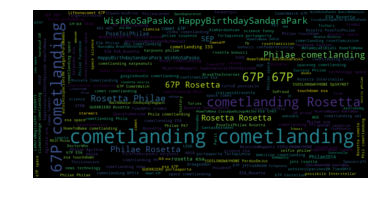

In [19]:
from parsing import *
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = CensusReader("data/CometLanding_refined.csv").data
hashTags = data.loc[:, 'entities_str']
words = []
for i, v in hashTags.iteritems():
    try:
        j = json.loads(v)
        for tag in j['hashtags']:
            if tag['text'] != "CometLanding":
                words.append(tag['text'])
    except TypeError:
        pass

wordcloud = WordCloud(width=1000, height=500).generate(" ".join(words))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [20]:
from parsing import *

cr = CensusReader("data/CometLanding_refined.csv")
print (cr.appUsed())


Top Platforms used 
1. ('Twitter Web Client', 27925)
2. ('Twitter for iPhone', 13743)
3. ('Twitter for Android', 12770)
4. ('TweetDeck', 4075)
5. ('Twitter for iPad', 3282)
6. ('dlvr.it', 1671)
7. ('Twitter for Websites', 1462)
8. ('Tweetbot for iÎŸS', 1055)
9. ('Twitter for Windows Phone', 932)
10. ('Tweet Old Post', 925)
11. ('Twitter for Mac', 915)
12. ('Twitter for Android Tablets', 897)
13. ('Hootsuite', 796)
14. ('TweetCaster for Android', 477)
15. ('Ø§Ø´ØªØ±Ø±ÙƒÙ€Ù€Ù€ Ø§Ù„Ø¢Ù†', 356)
16. ('Twitter for BlackBerryÂ®', 345)
17. ('Mobile Web (M5)', 315)
18. ('IFTTT', 303)
19. ('Twitter for BlackBerry', 291)
20. ('Tweetbot for Mac', 289)



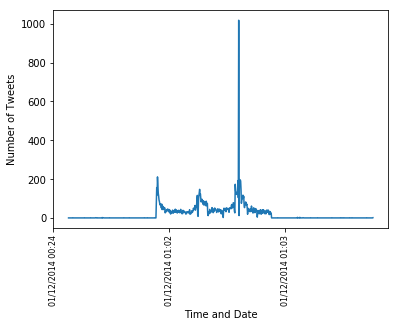

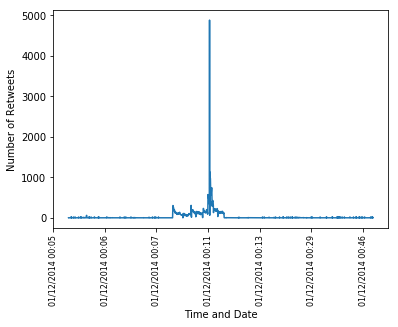

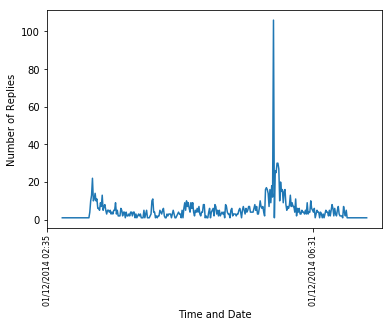

In [21]:
from parsing import *
from plotter import *

cr = CensusReader("data/CometLanding_refined.csv")
data = cr.data

plotter = Plotter()

plotter.tweetsTimeLine(data)
plotter.retweetsTimeLine(data)
plotter.repliesTimeLine(data)

In [ ]:
from parsing import *
from plotter import *

plotter = Plotter()

print("Analysing user interactions.\n")

data = CensusReader("data/CometLanding_refined.csv").data

replies = data[data['in_reply_to_screen_name'].notnull()]
retweets = data[data['text'].str.startswith("RT") == True]

mentions = data[data['text'].str.contains("@") == True]
mentions =  mentions[mentions['in_reply_to_screen_name'].notnull() == False]
mentions = mentions[mentions['text'].str.startswith("RT") == False]

print("There were " + str(len(replies)) + " replies prior to processing.")
print("There were " + str(len(retweets)) + " retweets prior to processing.")
print("There were " + str(len(mentions)) + " mentions containing mentions prior to processing.\n")

formattedRetweets = plotter.retweetsToTwoUsers(retweets)
formattedReplies = plotter.repliesToTwoUsers(replies)
formattedMentions = plotter.mentionsToTwoUsers(mentions)

interactions = formattedReplies + formattedRetweets + formattedMentions

retweets = len(formattedRetweets)
replies = len(formattedReplies)
mentions = len(formattedMentions)

print("There were " + str(replies) + " replies after processing.")
print("There were " + str(retweets) + " retweets after processing.")
print("There were " + str(mentions) + " mentions after processing.")
print("Note: a tweet containing >0 mentions can contain >1 mention.\n")

print("There were " + str(len(interactions)) + " interactions in total after processing.\n\n")

Analysing user interactions.

There were 1723 replies prior to processing.
There were 59998 retweets prior to processing.
There were 5044 mentions containing mentions prior to processing.

There were 1641 replies after processing.
There were 53377 retweets after processing.
There were 5972 mentions after processing.
Note: a tweet containing >0 mentions can contain >1 mention.

There were 55159 interactions in total after processing.




In [ ]:
from plotter import *
from parsing import *

plotter = Plotter()

data = CensusReader("data/CometLanding_refined.csv").data

replies = data[data['in_reply_to_screen_name'].notnull()]
retweets = data[data['text'].str.startswith("RT") == True]

mentions = data[data['text'].str.contains("@") == True]
mentions =  mentions[mentions['in_reply_to_screen_name'].notnull() == False]
mentions = mentions[mentions['text'].str.startswith("RT") == False]

formattedRetweets = plotter.retweetsToTwoUsers(retweets)
formattedReplies = plotter.repliesToTwoUsers(replies)
formattedMentions = plotter.mentionsToTwoUsers(mentions)

interactions = np.concatenate((formattedReplies, formattedMentions, formattedRetweets), axis=0)

plotter = Plotter()
plotter.networkGraph(interactions, "interactions")

In [ ]:
from plotter import *
from parsing import *

plotter = Plotter()

data = CensusReader("data/CometLanding_refined.csv").data

replies = data[data['in_reply_to_screen_name'].notnull()]
retweets = data[data['text'].str.startswith("RT") == True]

mentions = data[data['text'].str.contains("@") == True]
mentions =  mentions[mentions['in_reply_to_screen_name'].notnull() == False]
mentions = mentions[mentions['text'].str.startswith("RT") == False]

formattedRetweets = plotter.retweetsToTwoUsers(retweets)
formattedReplies = plotter.repliesToTwoUsers(replies)
formattedMentions = plotter.mentionsToTwoUsers(mentions)

plotter = Plotter()
plotter.networkGraph(formattedRetweets, "retweets")
plotter.networkGraph(formattedReplies, "replies")
plotter.networkGraph(formattedMentions, "mentions")

In [ ]:
from plotter import *
from parsing import *

plotter = Plotter()

data = CensusReader("data/CometLanding_refined.csv").data

replies = data[data['in_reply_to_screen_name'].notnull()]
retweets = data[data['text'].str.startswith("RT") == True]

mentions = data[data['text'].str.contains("@") == True]
mentions =  mentions[mentions['in_reply_to_screen_name'].notnull() == False]
mentions = mentions[mentions['text'].str.startswith("RT") == False]

formattedRetweets = plotter.retweetsToTwoUsers(retweets)
formattedReplies = plotter.repliesToTwoUsers(replies)
formattedMentions = plotter.mentionsToTwoUsers(mentions)

interactions = formattedReplies + formattedRetweets + formattedMentions

plotter = Plotter()
plotter.interactionsPieChart(len(formattedRetweets), len(formattedReplies), len(formattedMentions))